<a href="https://colab.research.google.com/github/BibinRJohn/MNIST-digit-classification-using-Neural-network/blob/main/MNIST_Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [19]:
#Loading the MNIST data set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [20]:
type(X_train)

numpy.ndarray

In [21]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data- 60k images
test data- 10k images
Image dimension - 28x28
Grayscale - 1 channel

In [22]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [23]:
print(X_train[10].shape)

(28, 28)


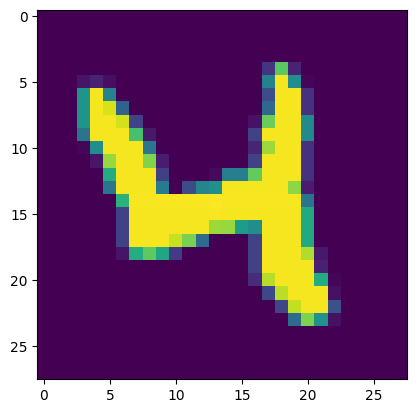

4


In [24]:
#displaying image
plt.imshow(X_train[20])
plt.show()

print(Y_train[20])

In [25]:
#image labels
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [26]:
#printing unique values in Y_train
print(np.unique(Y_train))

#printing unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [27]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

In [28]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

BUILDING A NEURAL NETWORK

In [32]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [35]:
#compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
#training the NN
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3048 - accuracy: 0.9118
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1435 - accuracy: 0.9576
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1053 - accuracy: 0.9685
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0831 - accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0694 - accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0592 - accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0515 - accuracy: 0.9837
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0454 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.035

In [37]:
#Accuracy on test data
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0958 - accuracy: 0.9734
0.9733999967575073


In [38]:
print(X_test.shape)

(10000, 28, 28)


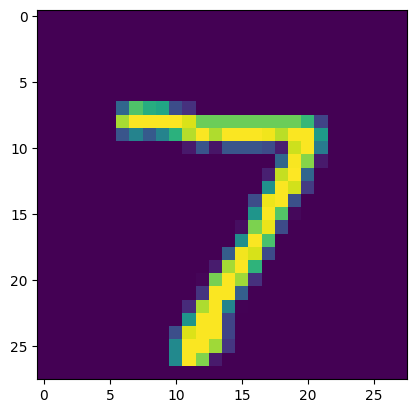

In [39]:
#first data pt in X_test
plt.imshow(X_test[0])
plt.show()

In [40]:
print(Y_test[0])

7


In [41]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [43]:
print(Y_pred.shape)
print(Y_pred[0])

(10000, 10)
[1.5415480e-02 2.2407947e-03 3.1763428e-01 3.0915526e-01 1.6771633e-10
 6.4703710e-02 8.6725144e-10 9.9991238e-01 9.1561060e-03 2.1567384e-03]


In [44]:
#converting the prediction probabilities to class label
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [45]:
#converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 2, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [47]:
#CONFUSION MATRIX
conf_matrix = confusion_matrix(Y_test, Y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 961    1    2    0    1    7    3    0    2    3]
 [   0 1127    3    0    0    1    2    0    2    0]
 [   2    4 1006    3    1    1    1   10    4    0]
 [   0    2    8  960    0   25    0    8    4    3]
 [   1    2    8    0  947    3    3    2    0   16]
 [   2    0    0    5    0  878    3    1    2    1]
 [   4    3    1    0    3    9  934    0    4    0]
 [   0    8    7    1    0    0    0 1006    2    4]
 [   6    1    5    3    3   11    1    5  933    6]
 [   0    4    0    2    6    4    2    7    2  982]], shape=(10, 10), dtype=int32)


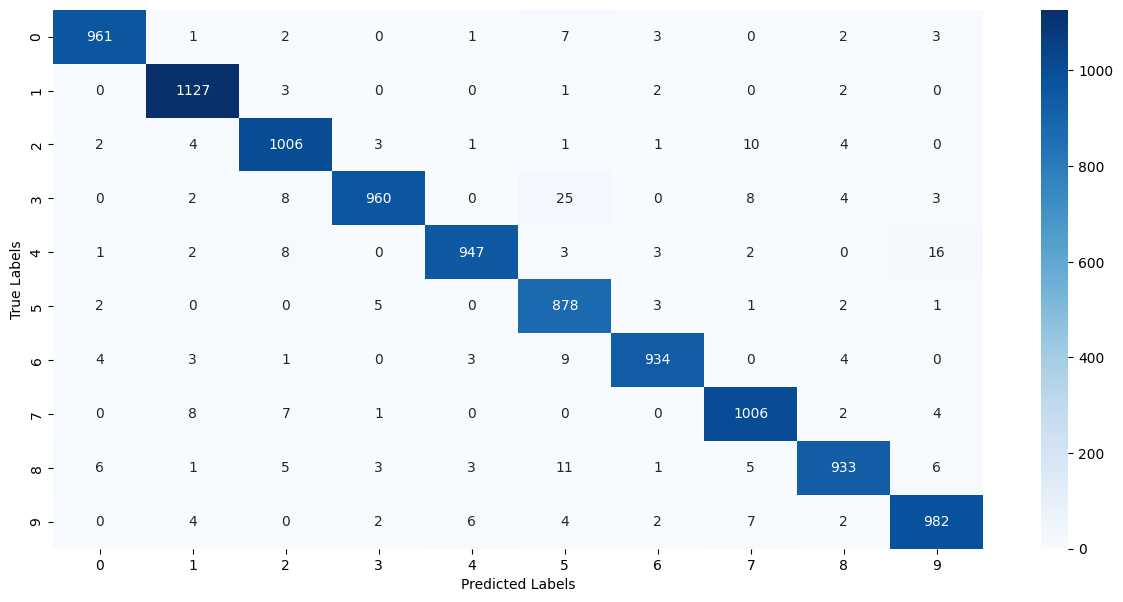

In [48]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

BUILDING A PREDICTIVE MODEL

In [49]:
input_image_path = '/content/mnist.png'
input_image = cv2.imread(input_image_path)

In [50]:
type(input_image)

numpy.ndarray

In [51]:
print(input_image)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[19 19 19]
  [19 19 19]
  [51 51 51]
  ...
  [51 51 51]
  [51 51 51]
  [19 19 19]]]


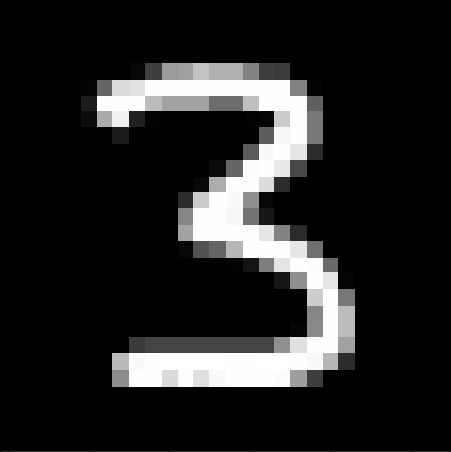

In [52]:
cv2_imshow(input_image)

In [53]:
input_image.shape

(452, 451, 3)

In [54]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [55]:
grayscale.shape

(452, 451)

In [56]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [57]:
input_image_resize.shape

(28, 28)

In [59]:
cv2_imshow(input_image_resize)

In [60]:
input_image_resize = input_image_resize/255

In [61]:
type(input_image_resize)

numpy.ndarray

In [62]:
input_reshaped = np.reshape(input_image_resize, (1,28,28))

In [63]:
input_prediction = model.predict(input_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 30ms/step
[[4.12196111e-10 9.70433641e-04 5.12066435e-05 9.99999881e-01
  4.14848245e-08 1.55030945e-02 1.28706648e-14 6.58406361e-06
  7.10244298e-01 3.89811099e-01]]


In [65]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


**PREDICTIVE SYS**

Path of the image to be predicted: /content/mnist.png


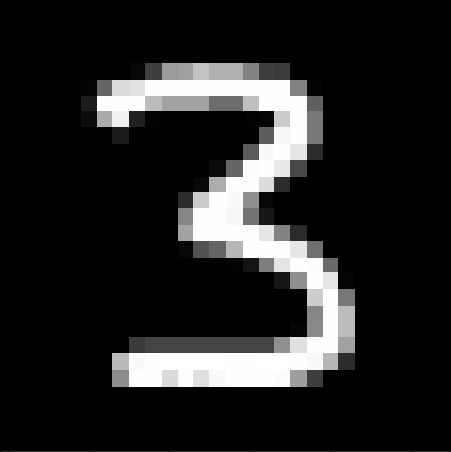

1/1 [==============================] - 0s 18ms/step
the number item digit is recognized as  3


In [66]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

input_reshaped = np.reshape(input_image_resize, (1,28,28))

input_prediction = model.predict(input_reshaped)

input_pred_label = np.argmax(input_prediction)

print("the number item digit is recognized as ", input_pred_label)
